Text(0, 0.5, 'y')

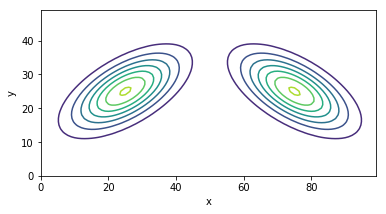

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt ###variousgauss###
import numpy as np                  
from scipy.stats import multivariate_normal 
import math

x, y = np.mgrid[0:100, 0:50]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x 
pos[:, :, 1] = y
b = multivariate_normal(mean=[25,25], cov=[[100, 25*math.sqrt(3)], [25*math.sqrt(3), 50]])
c = multivariate_normal(mean=[75,25], cov=[[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]])

for e in [b,c]:
    plt.contour(x, y, e.pdf(pos)) 

plt.gca().set_aspect('equal') #gca: 図を管理しているAxisというオブジェクトを返す
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [ ]:
eig_vals, eig_vec = np.linalg.eig(c.cov) ###eigen###

print("eig_vals: ", eig_vals)
print("eig_vec: ", eig_vec)
print("固有ベクトル1: ", eig_vec[:,0])   #eig_vecの縦の列が固有ベクトルに対応
print("固有ベクトル2: ", eig_vec[:,1])

In [ ]:
plt.contour(x, y, c.pdf(pos))     ###draweigen###

v = 2*math.sqrt(eig_vals[0])*eig_vec[:,0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="red", angles='xy', scale_units='xy', scale=1)

v = 2*math.sqrt(eig_vals[1])*eig_vec[:,1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="blue", angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
V = eig_vec   #eig_vecには固有ベクトルが並んでいるのでそのまま使える  ###eigenmatrix###
L = np.diag(eig_vals)  #np.diagで対角行列を作成

print("分解したものを計算:\n", V.dot(L.dot(np.linalg.inv(V))))
print("元の共分散行列:\n", np.array([[100, -25*math.sqrt(3)], [-25*math.sqrt(3), 50]]))